## Artificial Intelligence Assignment 1
## 1번 : 선형회귀
## 20132651 Sungjae Lee

## 0. 데이터셋의 생성

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 선형회귀를 위한 numpy, 시각화를 위한 matplotlib 패키지를 가져옵니다

In [2]:
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)
# 특징 X 와 목표값 y 를 선형성이 있는 난수 집합으로 생성합니다

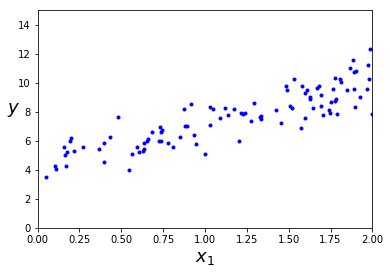

In [3]:
# 1. 화면 출력 확인
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])
plt.show()
# X 와 y 에 대한 산점도 그래프를 그립니다

## 1. 정규 방정식을 사용한 선형회귀 접근

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# numpy 의 linalg 를 사용하여 선형회귀를 진행합니다. 최적의 theta 값을 구합니다

In [5]:
# 2. theta_best 출력 확인
print(theta_best)

[[4.2803971]
 [2.8529455]]


In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
# X 값이 0 이거나 2 일때 y 값을 예측하여 y_predict 에 저장합니다

In [7]:
# 3. y_predict 출력 확인
print(y_predict)

[[4.2803971 ]
 [9.98628811]]


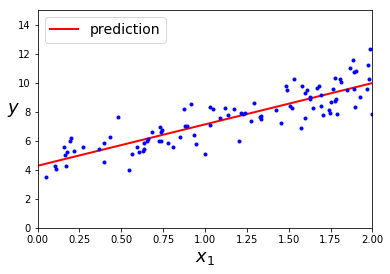

In [8]:
# 4. 화면 출력 확인
plt.plot(X_new, y_predict, "r-", linewidth = 2, label = "prediction")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 2, 0, 15])
plt.show()
# 두 점에 대한 예측 y_predict 와 테스트 X값 X_new 를 통해 직선을 그립니다
# 이 직선은 X 를 특성으로 y 값을 예측하는 선형회귀 직선입니다

In [9]:
from sklearn.linear_model import LinearRegression
# 이번에는 sklearn 의 linear regression 패키지를 이용하여 선형회귀를 구현합니다

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
# fit 메소드를 이용해 X 특성에 대한 y 목표값을 예측합니다.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# 5. lin_reg.intercept_, lin_reg.coef_ 출력 확인
print(lin_reg.intercept_, lin_reg.coef_)
# 생성된 LinearRegression 직선의 bias 와 weight 를 출력합니다

[4.2803971] [[2.8529455]]


In [12]:
# 6. lin_reg.predict(X_new) 출력 확인
print(lin_reg.predict(X_new))
# 해당 모델로 앞에 나온 테스트 데이터 X_new 를 예측합니다

[[4.2803971 ]
 [9.98628811]]


In [13]:
theta_best_svd, redisuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
# 최적의 theta 값을 찾습니다

In [14]:
# 7. theta_best_svd 출력 확인
print(theta_best_svd)

[[4.2803971]
 [2.8529455]]


In [15]:
# 8. np.linalg.pinv(X_b).dot(y) 출력 확인
print(np.linalg.pinv(X_b).dot(y))
# 테스트 데이터 X_b 에 대한 theta 를 출력합니다

[[4.2803971]
 [2.8529455]]


## 2. 경사 하강법을 사용한 선형회귀 접근

In [16]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
# 최적값을 찾기 위해 학습률이 0.1인 Gradient Descent를 1000회 반복합니다

In [17]:
# 9. theta 출력 확인
print(theta)
# 최적의 theta 값을 출력합니다

[[4.2803971]
 [2.8529455]]


In [18]:
print(X_new_b.dot(theta))
# 앞에서의 테스트셋 X_new_b 를 예측합니다

[[4.2803971 ]
 [9.98628811]]


In [19]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1", fontsize = 18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize = 16)
# theta 값의 변화에 따른 선형회귀 직선의 변화를 살펴보기 위해 함수를 생성합니다

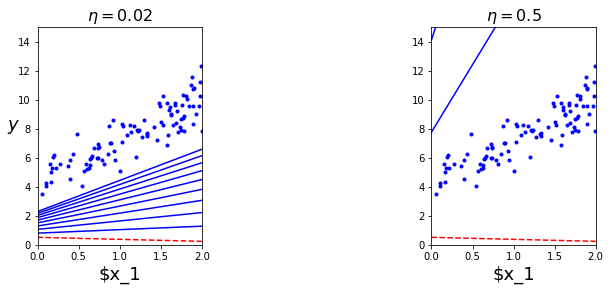

In [20]:
# 11. 화면 출력 확인
np.random.seed(42)
theta = np.random.randn(2, 1)
plt.figure(figsize = (10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(133)
plot_gradient_descent(theta, eta = 0.5)
plt.show()
# 학습률이 0.02 일 때와 0.5 일 때의 선형회귀 직선의 이동 변화를 볼 수 있습니다
# 학습률이 너무 작으면 시간이 너무 오래걸리며, 학습률이 너무 높으면 수렴하지 못합니다

## 3. 스토캐스틱 경사 하강법을 사용한 선형회귀 접근

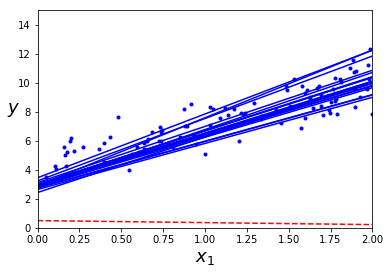

In [21]:
# 12. 화면 출력 확인
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])
plt.show()
# 스토캐스틱 경사 하강법을 이용하여 특정 샘플에 대해서 Gradient 를 계산하고 경사 하강을 진행합니다
# 이를 통해 배치 경사 하강 알고리즘에 비해 빠른 속도로 경사 하강이 진행됩니다

In [22]:
# 13. theta 출력 확인
print(theta)
# 최종적인 theta 값을 출력합니다

[[4.27380642]
 [2.86748498]]


In [23]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1, random_state = 42)
# sklearn 패키지의 스토캐스틱 경사 하강 알고리즘을 가져옵니다

In [24]:
# 14. sgd_reg.fit(X, y.ravel()) 출력 확인
sgd_reg.fit(X, y.ravel())
# 가져온 모델을 X 와 y 를 이용하여 학습시킵니다

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [25]:
# 15. sgd_reg.intercept_, sgd_reg.coef_ 출력 확인
print(sgd_reg.intercept_)
print(sgd_reg.coef_)
# 스토캐스틱 경사 하강 알고리즘을 통해 만들어진 모델의 bias 와 weight 를 출력합니다

[4.29513019]
[2.88698744]


In [26]:
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20
np.random.seed(42)
theta = np.random.randn(2, 1)
t0, t1 = 200, 1000
def learning_schedule(t):
    return t0/(t+t1)
t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i + minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
# 미니 배치 경사하강법을 이용하여 모델을 생성합니다
# 이 때 최적의 theta 값을 저장합니다

In [27]:
# 16. theta 출력 확인
print(theta)
# 미니 배치 경사하강법의 최적 theta 값을 출력합니다

[[4.22470385]
 [2.84780161]]


In [28]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)
# 배치 경사 하강 / 스토캐스틱 경사 하강 / 미니 배치 경사 하강의 theta 진행을 저장합니다

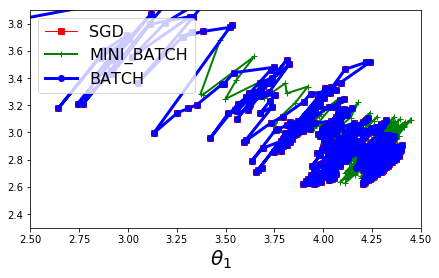

In [29]:
plt.figure(figsize = (7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth = 1, label = "SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth = 2, label = "MINI_BATCH")
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "b-o", linewidth = 3, label = "BATCH")
plt.legend(loc = "upper left", fontsize = 16)
plt.xlabel(r"$\theta_0$", fontsize = 20)
plt.xlabel(r"$\theta_1$  ", fontsize = 20, rotation = 0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
# 각각의 방법이 어떤 경로로 최적의 theta 값을 찾아가는지 그래프로 표현합니다